Unique classes in y_train: [0 1 2 3 4]
Unique classes in y_test: [0 1 2 3 4]
Number of classes: 5
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.0629 - loss: 1.8882 - val_accuracy: 0.0612 - val_loss: 1.7311
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0990 - loss: 1.7184 - val_accuracy: 0.0816 - val_loss: 1.6717
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1131 - loss: 1.6864 - val_accuracy: 0.1224 - val_loss: 1.6280
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2008 - loss: 1.6342 - val_accuracy: 0.3265 - val_loss: 1.5946
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2356 - loss: 1.5861 - val_accuracy: 0.3673 - val_loss: 1.5693
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3165 - loss: 1.5580 - val_accuracy: 0.4490 - val_loss: 1.5398
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4350 - loss: 1.4800 - val_accuracy: 0.5102 - val_loss: 1.4964
Epoch 8/100
7/7 ━━━━━━━━━━

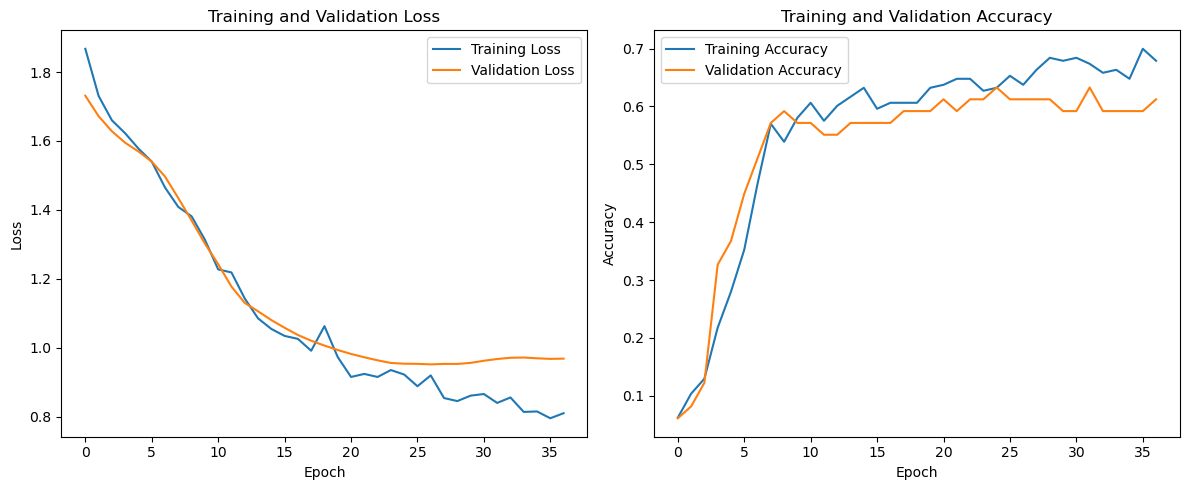

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Neural Network Accuracy: 0.5410
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.93      0.79        29
           1       0.00      0.00      0.00        12
           2       0.38      0.33      0.35         9
           3       0.25      0.43      0.32         7
           4       0.00      0.00      0.00         4

    accuracy                           0.54        61
   macro avg       0.26      0.34      0.29        61
weighted avg       0.41      0.54      0.47        61



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


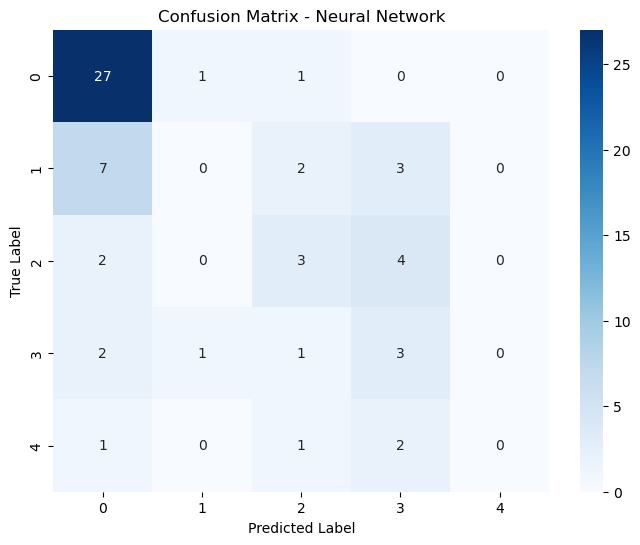

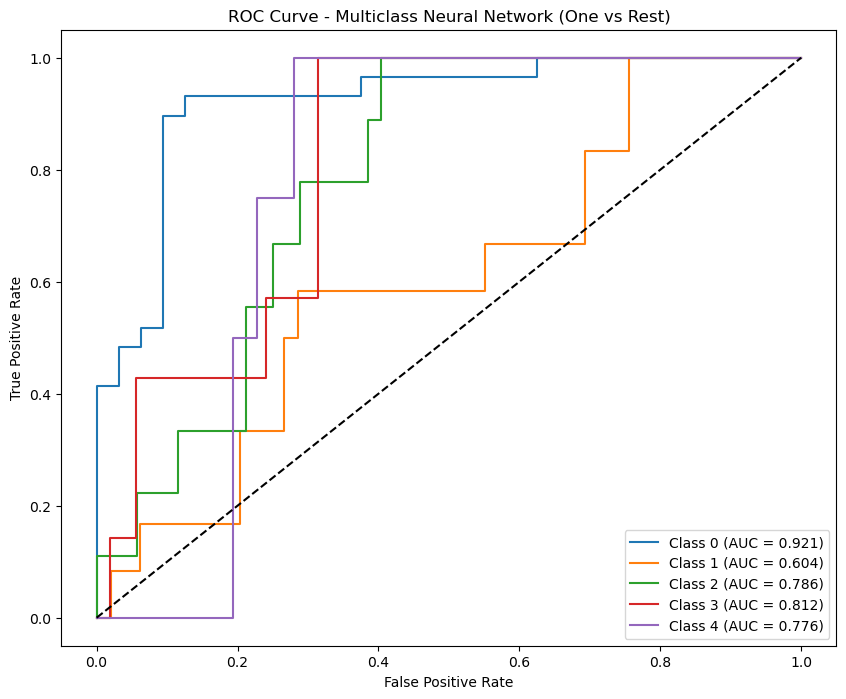

Neural Network model saved successfully!


In [8]:
import pandas as pd
import numpy as np
import pickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

# Load the enhanced data
with open('data/enhanced_train_test_split.pkl', 'rb') as f:
    X_train, X_test, y_train, y_test = pickle.load(f)

# Check the unique classes in y
print(f"Unique classes in y_train: {np.unique(y_train)}")
print(f"Unique classes in y_test: {np.unique(y_test)}")

# Determine if binary or multiclass
num_classes = len(np.unique(np.concatenate([y_train, y_test])))
print(f"Number of classes: {num_classes}")

# Ensure data is normalized
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler for later use
with open('models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Define neural network architecture
def create_model(input_shape, num_classes):
    if num_classes == 2:
        # Binary classification
        model = keras.Sequential([
            layers.Input(shape=(input_shape,)),
            layers.Dense(64, activation='relu'),
            layers.Dropout(0.3),
            layers.Dense(32, activation='relu'),
            layers.Dropout(0.2),
            layers.Dense(16, activation='relu'),
            layers.Dense(1, activation='sigmoid')
        ])
        
        model.compile(
            optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy']
        )
    else:
        # Multiclass classification
        model = keras.Sequential([
            layers.Input(shape=(input_shape,)),
            layers.Dense(64, activation='relu'),
            layers.Dropout(0.3),
            layers.Dense(32, activation='relu'),
            layers.Dropout(0.2),
            layers.Dense(16, activation='relu'),
            layers.Dense(num_classes, activation='softmax')
        ])
        
        model.compile(
            optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )
    
    return model

# Create and train model
input_shape = X_train_scaled.shape[1]
model = create_model(input_shape, num_classes)

# Define callbacks
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    restore_best_weights=True
)

# Train model
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.savefig('nn_training_history.png')
plt.show()

# Evaluate model
if num_classes == 2:
    y_pred_proba = model.predict(X_test_scaled)
    y_pred = (y_pred_proba > 0.5).astype(int)
else:
    y_pred_proba = model.predict(X_test_scaled)
    y_pred = np.argmax(y_pred_proba, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Neural Network Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Neural Network')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('nn_confusion_matrix.png')
plt.show()

# Plot ROC curve - handles both binary and multiclass
if num_classes == 2:
    # Binary classification
    if len(y_pred_proba.shape) > 1:
        y_pred_proba = y_pred_proba.flatten()
    
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'Neural Network (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Neural Network')
    plt.legend(loc='lower right')
    plt.savefig('nn_roc_curve.png')
    plt.show()
else:
    # Multiclass classification - One vs Rest ROC curve
    # Binarize the output for ROC curve
    y_test_bin = label_binarize(y_test, classes=np.unique(np.concatenate([y_train, y_test])))
    n_classes = y_test_bin.shape[1]
    
    # Predict class probabilities
    if len(y_pred_proba.shape) == 1:  # If predictions are already flattened
        # Create one-hot encoding
        y_pred_one_hot = np.zeros((len(y_pred_proba), num_classes))
        for i, pred in enumerate(y_pred):
            y_pred_one_hot[i, pred] = 1
        y_pred_proba = y_pred_one_hot
    
    # Compute ROC curve and ROC area for each class
    fpr = {}
    tpr = {}
    roc_auc = {}
    
    plt.figure(figsize=(10, 8))
    
    for i in range(n_classes):
        try:
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
            
            plt.plot(
                fpr[i], tpr[i],
                label=f'Class {i} (AUC = {roc_auc[i]:.3f})'
            )
        except:
            print(f"Could not calculate ROC for class {i}")
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Multiclass Neural Network (One vs Rest)')
    plt.legend(loc='lower right')
    plt.savefig('nn_multiclass_roc_curve.png')
    plt.show()

# Save the trained model
model.save('models/nn_model.h5')
print("Neural Network model saved successfully!")